<a href="https://colab.research.google.com/github/VICKCUL/CDP-project/blob/main/CDP2020_9_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries

# basic data analysis library
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

# modeling
import torch
import torchvision
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import pickle

import warnings
warnings.filterwarnings("ignore")

def set_device():
  device = "cude" if torch.cuda.is_available() else "cpu"
  if device != "cuda":
    print("WARNING: For this notebook to perform best, "
    "if possible, in the menu under `Runtime` ->"
    "`Change runtime type.` select `GPU`")
  else:
    print("GPU is enable in this notebook")

  return device

# set global varaiables
DEVICE = set_device()
DEVICE

'cpu'

In [ ]:
#pip install nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

True

## Load Data

In [ ]:
# Import data from github
!git clone https://github.com/VICKCUL/CDP-project.git

fatal: destination path 'CDP-project' already exists and is not an empty directory.


In [ ]:
!ls

CDP-project  sample_data  test	test1


In [ ]:
import pandas as pd

raw_df = pd.read_csv("/content/CDP-project/CDP2020.csv", encoding='latin-1')
print(raw_df.shape)

# drop NaNs
df1 = raw_df.dropna() # about 3/4 quantity of the rows are useless! # remove base on colmun of our interes
print(df1.shape)
df1.iloc[:,6]

(8065, 7)
(2737, 7)


,9.7. Please use the table below to describe your companyÕs actions to reduce its GHG emissions.
1,9.7 C1.
2,1. Actions - please describe
4,Stopping of one BFW pump of UB8/9
5,Air fin fan blades replacement with FRP
6,Automatic combusion control for DHDS charge he...
...,...
4817,In May 2009 Transurban commenced a trial to re...
4820,All our new campuses are designed and built on...
4826,We reduced businss travel significantly during...
4828,"Process energy conservation initiatives, a few..."


## Data Cleaning

In [ ]:
# create preprocess_text function: to clear out words like a, the, this, that, is, of, etc.
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')] # check more in stopwrds
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    # Join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text
# apply the function df
# df['reviewText'] = df['reviewText'].apply(preprocess_text)
# df

df1['Text'] = df1.iloc[:,6].apply(preprocess_text)

df1

,Organisation,Country,Access,Primary Expansion,Secondary Expansions,Complexity,9.7. Please use the table below to describe your companyÕs actions to reduce its GHG emissions.,Text
1,Bharat Petroleum Corporation,India,Public,India 200,Emerging Markets 800,Long,9.7 C1.,9.7 c1 .
2,Bharat Petroleum Corporation,India,Public,India 200,Emerging Markets 800,Long,1. Actions - please describe,1. action - please describe
4,Bharat Petroleum Corporation,India,Public,India 200,Emerging Markets 800,Long,Stopping of one BFW pump of UB8/9,stopping one bfw pump ub8/9
5,Bharat Petroleum Corporation,India,Public,India 200,Emerging Markets 800,Long,Air fin fan blades replacement with FRP,air fin fan blade replacement frp
6,Bharat Petroleum Corporation,India,Public,India 200,Emerging Markets 800,Long,Automatic combusion control for DHDS charge he...,automatic combusion control dhds charge heater
...,...,...,...,...,...,...,...,...
4817,Goldman Sachs Group Inc.,USA,Public,FTSE 600,FTSE All-World 800; Global 500; S&P 500; FTSE ...,Long,In May 2009 Transurban commenced a trial to re...,may 2009 transurban commenced trial reduce ven...
4820,Intercontinental Hotels Group,United Kingdom,Public,FTSE 600,Mayday; FTSE 100; FTSE 350,Long,All our new campuses are designed and built on...,new campus designed built leed building standa...
4826,Nexen Inc.,Canada,Public,Canada 200,Bonds 180; FTSE All-World 800,Long,We reduced businss travel significantly during...,reduced businss travel significantly 2009-10. ...
4828,"TECO Energy, Inc.",USA,Public,S&P 500,Electric Utilities 250,Long,"Process energy conservation initiatives, a few...","process energy conservation initiative , examp..."


In [ ]:
import string
# Remove punctuation from the 'Text' column
df1['Text'] = df1['Text'].str.replace(f"[{string.punctuation}]", "", regex=True)
df1

,Organisation,Country,Access,Primary Expansion,Secondary Expansions,Complexity,9.7. Please use the table below to describe your companyÕs actions to reduce its GHG emissions.,Text
1,Bharat Petroleum Corporation,India,Public,India 200,Emerging Markets 800,Long,9.7 C1.,97 c1
2,Bharat Petroleum Corporation,India,Public,India 200,Emerging Markets 800,Long,1. Actions - please describe,1 action please describe
4,Bharat Petroleum Corporation,India,Public,India 200,Emerging Markets 800,Long,Stopping of one BFW pump of UB8/9,stopping one bfw pump ub89
5,Bharat Petroleum Corporation,India,Public,India 200,Emerging Markets 800,Long,Air fin fan blades replacement with FRP,air fin fan blade replacement frp
6,Bharat Petroleum Corporation,India,Public,India 200,Emerging Markets 800,Long,Automatic combusion control for DHDS charge he...,automatic combusion control dhds charge heater
...,...,...,...,...,...,...,...,...
4817,Goldman Sachs Group Inc.,USA,Public,FTSE 600,FTSE All-World 800; Global 500; S&P 500; FTSE ...,Long,In May 2009 Transurban commenced a trial to re...,may 2009 transurban commenced trial reduce ven...
4820,Intercontinental Hotels Group,United Kingdom,Public,FTSE 600,Mayday; FTSE 100; FTSE 350,Long,All our new campuses are designed and built on...,new campus designed built leed building standa...
4826,Nexen Inc.,Canada,Public,Canada 200,Bonds 180; FTSE All-World 800,Long,We reduced businss travel significantly during...,reduced businss travel significantly 200910 co...
4828,"TECO Energy, Inc.",USA,Public,S&P 500,Electric Utilities 250,Long,"Process energy conservation initiatives, a few...",process energy conservation initiative exampl...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#creating a new column in the dataframe that stores a boolean value whether that row is a duplicate or not
df1['dup'] = df1.duplicated(subset=None, keep='first')

#checking how many duplicates there were by counding the True and False values in that column
df1['dup'].value_counts() # about 5% of the dataset are duplicates. Let's delete them
df1.head()
# let's write the data into a new dataframe, only keeping the lines where the value for "dup" is False
df1 = df1[df1['dup'] == False]
print(df1.shape)

del df1['dup'] # deleting "dup" column since we don't need ot anymore
df1.tail()

(2626, 9)


,Organisation,Country,Access,Primary Expansion,Secondary Expansions,Complexity,9.7. Please use the table below to describe your companyÕs actions to reduce its GHG emissions.,Text
4817,Goldman Sachs Group Inc.,USA,Public,FTSE 600,FTSE All-World 800; Global 500; S&P 500; FTSE ...,Long,In May 2009 Transurban commenced a trial to re...,may 2009 transurban commenced trial reduce ven...
4820,Intercontinental Hotels Group,United Kingdom,Public,FTSE 600,Mayday; FTSE 100; FTSE 350,Long,All our new campuses are designed and built on...,new campus designed built leed building standa...
4826,Nexen Inc.,Canada,Public,Canada 200,Bonds 180; FTSE All-World 800,Long,We reduced businss travel significantly during...,reduced businss travel significantly 200910 co...
4828,"TECO Energy, Inc.",USA,Public,S&P 500,Electric Utilities 250,Long,"Process energy conservation initiatives, a few...",process energy conservation initiative exampl...
4834,XTO Energy Inc.,USA,Public,S&P 500,Bonds 180; Global 500; FTSE All-World 800,Long,Sustainability September employee engagement p...,sustainability september employee engagement p...


In [ ]:
# Data Explainary Analysis
first_10 = df1['Country'].value_counts()[:10]
print(first_10.mean()) #mean incidents per year of 10 biggest countries

print(first_10.std())
#standard deviation

209.0
185.27637014291201


<Axes: xlabel='Country'>

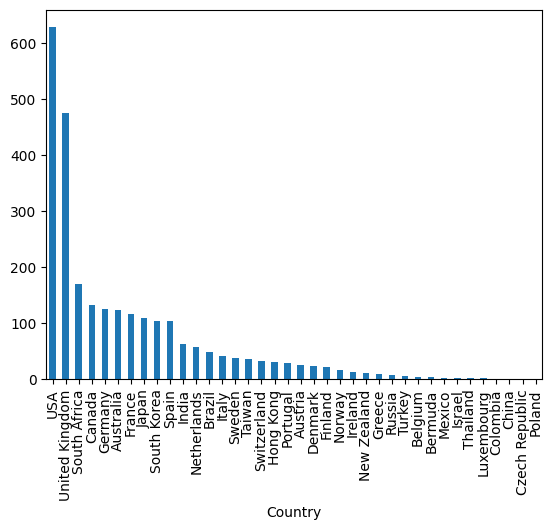

In [ ]:
df1['Country'].value_counts().plot.bar()

In [ ]:
#top 5
print(df1['Country'].value_counts()[:10])
sum(df1['Country'].value_counts()[:10])

Country
USA               628
United Kingdom    476
South Africa      170
Canada            133
Germany           126
Australia         123
France            117
Japan             109
South Korea       104
Spain             104
Name: count, dtype: int64


2090

** Text Count**

In [ ]:
from collections import Counter

split_it = df1["Text"][2].split()

# Pass the split_it list to instance of Counter class.
Counter = Counter(split_it)

# most_common() produces k frequently encountered
# input values and their respective counts.
most_occur = Counter.most_common(5)

print(most_occur)

[('1', 1), ('action', 1), ('please', 1), ('describe', 1)]


In [ ]:

# for i in range(len(df1["Text"])):
#   split_it = df1["Text"].iloc[i].split()
#   Counter = Counter(split_it)
#   most_occur = Counter.most_common(3)
#   print(most_occur)

** WordCloud**

In [ ]:
# pip install wordcloud

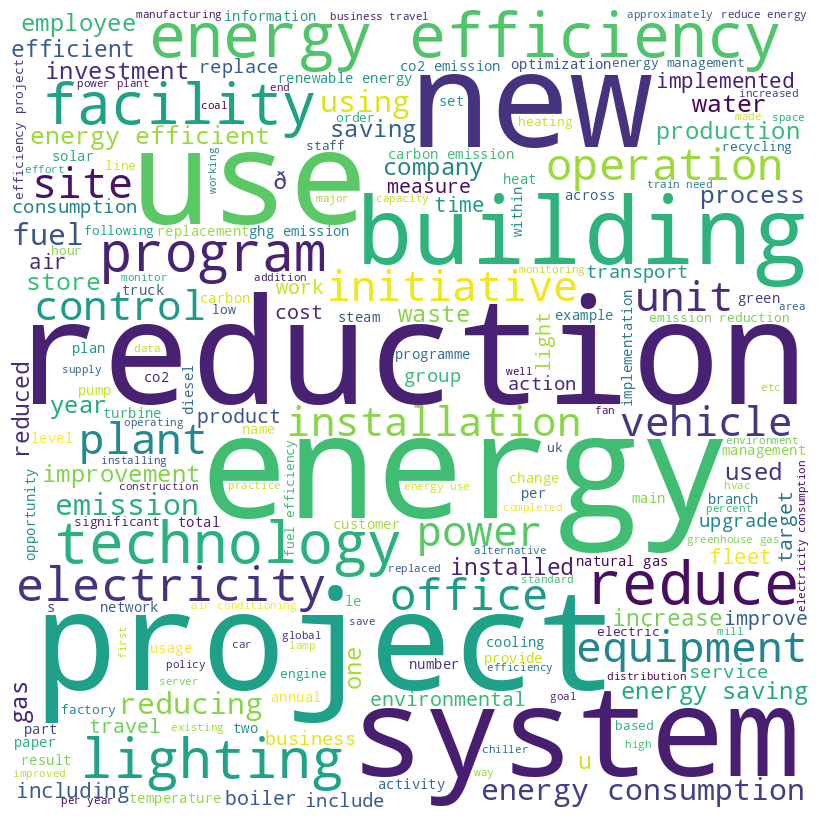

{'reduction': 1.0, 'energy': 1.0, 'project': 0.8869565217391304, 'new': 0.8260869565217391, 'use': 0.8043478260869565, 'system': 0.7260869565217392, 'building': 0.7130434782608696, 'energy efficiency': 0.7, 'reduce': 0.6260869565217392, 'technology': 0.6086956521739131, 'facility': 0.591304347826087, 'lighting': 0.5565217391304348, 'program': 0.5347826086956522, 'electricity': 0.5130434782608696, 'operation': 0.46956521739130436, 'office': 0.4652173913043478, 'equipment': 0.4608695652173913, 'plant': 0.45652173913043476, 'initiative': 0.4260869565217391, 'power': 0.41739130434782606, 'site': 0.40869565217391307, 'installation': 0.4, 'unit': 0.391304347826087, 'vehicle': 0.391304347826087, 'control': 0.3826086956521739, 'energy consumption': 0.3739130434782609, 'emission': 0.3695652173913043, 'reducing': 0.3695652173913043, 'using': 0.3652173913043478, 'fuel': 0.36086956521739133, 'energy efficient': 0.34782608695652173, 'water': 0.34347826086956523, 'process': 0.34347826086956523, 'sto

In [ ]:
# Python program to generate WordCloud

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

# df = pd.read_csv("/content/drive/MyDrive/CDP Project/Data/CDP2010.csv", encoding='latin-1')

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
# for val in df["Country"]:
for val in df1["Text"]:

	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()

	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()

	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()
print(wordcloud.words_)

In [ ]:
from collections import Counter

# Get the word counts from the WordCloud object
word_counts = wordcloud.process_text(df1["Text"][1])

# Sort the words by frequency
sorted_word_counts = Counter(word_counts).most_common()

# Display the word counts
for word, count in sorted_word_counts:
    print(f'{word}: {count}')

c1: 1


In [ ]:
for index, row in df1.iterrows():
  word_counts = wordcloud.process_text(row["Text"])
  sorted_word_counts = Counter(word_counts).most_common()
  print(sorted_word_counts)

[('c1', 1)]
[('action', 1), ('please', 1), ('describe', 1)]
[('stopping', 1), ('one', 1), ('bfw', 1), ('pump', 1), ('ub89', 1)]
[('air', 1), ('fin', 1), ('fan', 1), ('blade', 1), ('replacement', 1), ('frp', 1)]
[('automatic', 1), ('combusion', 1), ('control', 1), ('dhds', 1), ('charge', 1), ('heater', 1)]
[('lp', 1), ('steam', 1), ('aph', 1), ('cdu2', 1), ('charge', 1), ('heater', 1)]
[('dea', 1), ('flow', 1), ('optimization', 1), ('fuel', 1), ('gas', 1), ('amine', 1), ('absorption', 1), ('unit', 1)]
[('cascade', 1), ('control', 1), ('steam', 1), ('reboilers', 1), ('aromatic', 1), ('recoery', 1), ('unit', 1)]
[('lp', 1), ('steam', 1), ('extraction', 1), ('ddc2', 1), ('compressor', 1)]
[('commisioning', 1), ('hp', 1), ('mp', 1), ('turbine', 1), ('cooling', 1), ('water', 1), ('pump', 1), ('dhds', 1)]
[('stepless', 1), ('control', 1), ('hcu', 1), ('compressor', 1), ('leading', 1), ('reduction', 1), ('electricity', 1), ('consumption', 1)]
[('modification', 1), ('pump', 1), ('circulation', 

** Sentiment Analaysis**

In [ ]:
from collections import Counter
Counter(df1["Complexity"]) # seems like all Access are Public and most of the rows have Long comlexity

Counter({'Long': 2623, 'Short': 3})

In [ ]:
# initialize NLTK sentiment analyzer
analyzer = SentimentIntensityAnalyzer()
# create get_sentiment function
def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    sentiment = 1 if scores['pos'] > 0 else 0
    return sentiment
# # apply get_sentiment function
# df['sentiment'] = df['reviewText'].apply(get_sentiment)
# df

df1['sentiment'] = df1['Text'].apply(get_sentiment)
df1

,Organisation,Country,Access,Primary Expansion,Secondary Expansions,Complexity,9.7. Please use the table below to describe your companyÕs actions to reduce its GHG emissions.,Text,sentiment
1,Bharat Petroleum Corporation,India,Public,India 200,Emerging Markets 800,Long,9.7 C1.,97 c1,0
2,Bharat Petroleum Corporation,India,Public,India 200,Emerging Markets 800,Long,1. Actions - please describe,1 action please describe,1
4,Bharat Petroleum Corporation,India,Public,India 200,Emerging Markets 800,Long,Stopping of one BFW pump of UB8/9,stopping one bfw pump ub89,0
5,Bharat Petroleum Corporation,India,Public,India 200,Emerging Markets 800,Long,Air fin fan blades replacement with FRP,air fin fan blade replacement frp,1
6,Bharat Petroleum Corporation,India,Public,India 200,Emerging Markets 800,Long,Automatic combusion control for DHDS charge he...,automatic combusion control dhds charge heater,0
...,...,...,...,...,...,...,...,...,...
4817,Goldman Sachs Group Inc.,USA,Public,FTSE 600,FTSE All-World 800; Global 500; S&P 500; FTSE ...,Long,In May 2009 Transurban commenced a trial to re...,may 2009 transurban commenced trial reduce ven...,1
4820,Intercontinental Hotels Group,United Kingdom,Public,FTSE 600,Mayday; FTSE 100; FTSE 350,Long,All our new campuses are designed and built on...,new campus designed built leed building standa...,1
4826,Nexen Inc.,Canada,Public,Canada 200,Bonds 180; FTSE All-World 800,Long,We reduced businss travel significantly during...,reduced businss travel significantly 200910 co...,1
4828,"TECO Energy, Inc.",USA,Public,S&P 500,Electric Utilities 250,Long,"Process energy conservation initiatives, a few...",process energy conservation initiative exampl...,1


In [ ]:
df1["pos"] = 0
for i in range(len(df1["Country"])):
  if df1["Country"].iloc[i] == "USA":
  # print(i)
    df1["pos"].iloc[i] = 1

# df1['Country'].value_counts()[:10]
df1

,Organisation,Country,Access,Primary Expansion,Secondary Expansions,Complexity,9.7. Please use the table below to describe your companyÕs actions to reduce its GHG emissions.,Text,sentiment,pos
1,Bharat Petroleum Corporation,India,Public,India 200,Emerging Markets 800,Long,9.7 C1.,97 c1,0,0
2,Bharat Petroleum Corporation,India,Public,India 200,Emerging Markets 800,Long,1. Actions - please describe,1 action please describe,1,0
4,Bharat Petroleum Corporation,India,Public,India 200,Emerging Markets 800,Long,Stopping of one BFW pump of UB8/9,stopping one bfw pump ub89,0,0
5,Bharat Petroleum Corporation,India,Public,India 200,Emerging Markets 800,Long,Air fin fan blades replacement with FRP,air fin fan blade replacement frp,1,0
6,Bharat Petroleum Corporation,India,Public,India 200,Emerging Markets 800,Long,Automatic combusion control for DHDS charge he...,automatic combusion control dhds charge heater,0,0
...,...,...,...,...,...,...,...,...,...,...
4817,Goldman Sachs Group Inc.,USA,Public,FTSE 600,FTSE All-World 800; Global 500; S&P 500; FTSE ...,Long,In May 2009 Transurban commenced a trial to re...,may 2009 transurban commenced trial reduce ven...,1,1
4820,Intercontinental Hotels Group,United Kingdom,Public,FTSE 600,Mayday; FTSE 100; FTSE 350,Long,All our new campuses are designed and built on...,new campus designed built leed building standa...,1,0
4826,Nexen Inc.,Canada,Public,Canada 200,Bonds 180; FTSE All-World 800,Long,We reduced businss travel significantly during...,reduced businss travel significantly 200910 co...,1,0
4828,"TECO Energy, Inc.",USA,Public,S&P 500,Electric Utilities 250,Long,"Process energy conservation initiatives, a few...",process energy conservation initiative exampl...,1,1


In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(df1['pos'], df1['sentiment']))

[[1022  976]
 [ 300  328]]
